In [1]:

import numpy as np
import pymisca.util as pyutil;reload(pyutil)
import pymisca.vis_util as pyvis;reload(pyvis)
%matplotlib inline 

is in ipython: 1
is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network
[WARN] pymisca.vis_util cannot find network


/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[WARN]unable to import edward.models
[WARN]unable to import edward.models
()
()
(<tf.Tensor 'JointScalar/batch_shape_tensor/batch_shape:0' shape=(0,) dtype=int32>, array([], dtype=int32))
(2,)
(<tf.Tensor 'JointScalar/event_shape_tensor/event_shape:0' shape=(1,) dtype=int32>, array([2], dtype=int32))
(100, 50, 2)


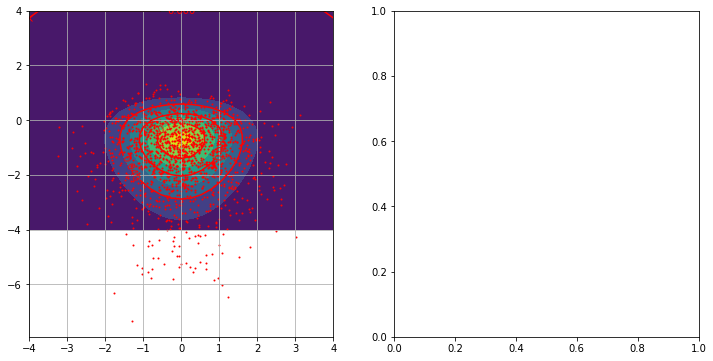

In [2]:
import pymisca.tensorflow_extra as pytf; reload(pytf)
import tensorflow as tf
import tensorflow_probability.python.distributions as tfdist
# tfdist = tfd
    
sess =tf.InteractiveSession()
x = tfdist.Normal(0.,1.,)
# y = tfdist.Normal([0.,]*3,[1.]*3,)
y = tfdist.Gamma(1.,2.)
import tensorflow_probability as tfp
bjt = tfp.bijectors.Invert(tfp.bijectors.Exp())
y = tfdist.TransformedDistribution(bijector=bjt,distribution=y)


print (x.batch_shape)

j = pytf.JointScalar([x,y,])
v = j.batch_shape
t = j.batch_shape_tensor()
print (v)
print (t,t.eval())

v = j.event_shape
t = j.event_shape_tensor()
print (v)
print (t,t.eval())

X = np.random.random(size= [100,50] + 
                     (j.event_shape).as_list()).astype(np.float32)
print (X.shape)
j.log_prob(X).eval()


with sess.as_default():
    dist = j
    f = dist.prob
    L = f(X).eval()
#     f = emission.distribution.distribution.prob
    f = pyutil.wrapTFmethod(f,sess=sess)
    f = pyutil.arrayFunc2mgridFunc(f)
    pyvis.dmet_2d(f,vectorised=1,span=[-4,4]);    
    Y = dist.sample(1500).eval()
    pyvis.plt.scatter(Y.T[0],Y.T[1],1,c='r')


In [3]:
# x = tfdist.Normal(0.,1.,)
%pdb 1
x = tfdist.Normal([0.,]*3,[1.]*3,)
y = tfdist.Gamma(1.,2.)
import tensorflow_probability as tfp
bjt = tfp.bijectors.Invert(tfp.bijectors.Exp())
y = tfdist.TransformedDistribution(bijector=bjt,distribution=y)


print (x.batch_shape)

j = pytf.JointScalar([x,y,])
Y = j.sample((1000,2)).eval()
print (Y.shape)
Y = np.squeeze(Y)

L = j.log_prob(Y)


Automatic pdb calling has been turned ON
(3,)
(1000, 2, 4)


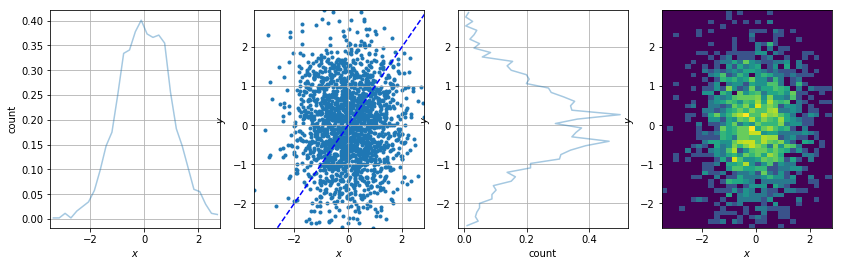

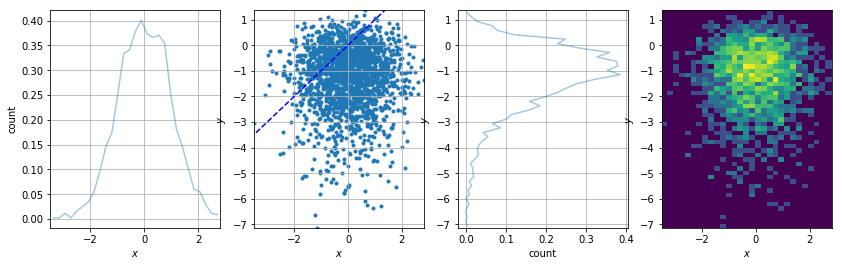

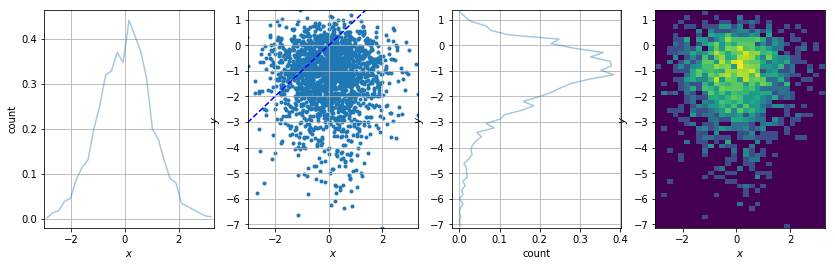

In [4]:
pyvis.qc_2var(Y.T[0],Y.T[1])
pyvis.qc_2var(Y.T[0],Y.T[-1])
pyvis.qc_2var(Y.T[-2],Y.T[-1])